## Purpose of this project:

This document details the implementation details carried out by the House prediction. The document describes the problem statement, approach, analysis, and the proposed scalable architecture. The code and graphical representation of the analysis have been explained in detail for the clarity of the reader.




## Problem Statement And Motivation:

Purchasing a home has become more difficult in recent years, buyers are becoming more cautious about their spending and market strategy. They consistently work to maximize the budget that satisfies their needs and expectations. The ideal home is one that satisfies the customer's needs and fits within their budget.So, when it comes to budget planning, price forecasts are crucial. This large amount of data has information and hidden patterns. House Price Prediction can be seen as a good application in big data. Due to the high number of variables, certain tools are used to determine the variables for feature selection to derive the significant characteristics that Predict the final sale price of a house.
The goal of this statistical analysis is to understand the relationship between house features and how these features affect the prices. These features and relationships will be used to predict the house prices using machine learning.




## Future Work pipeline:

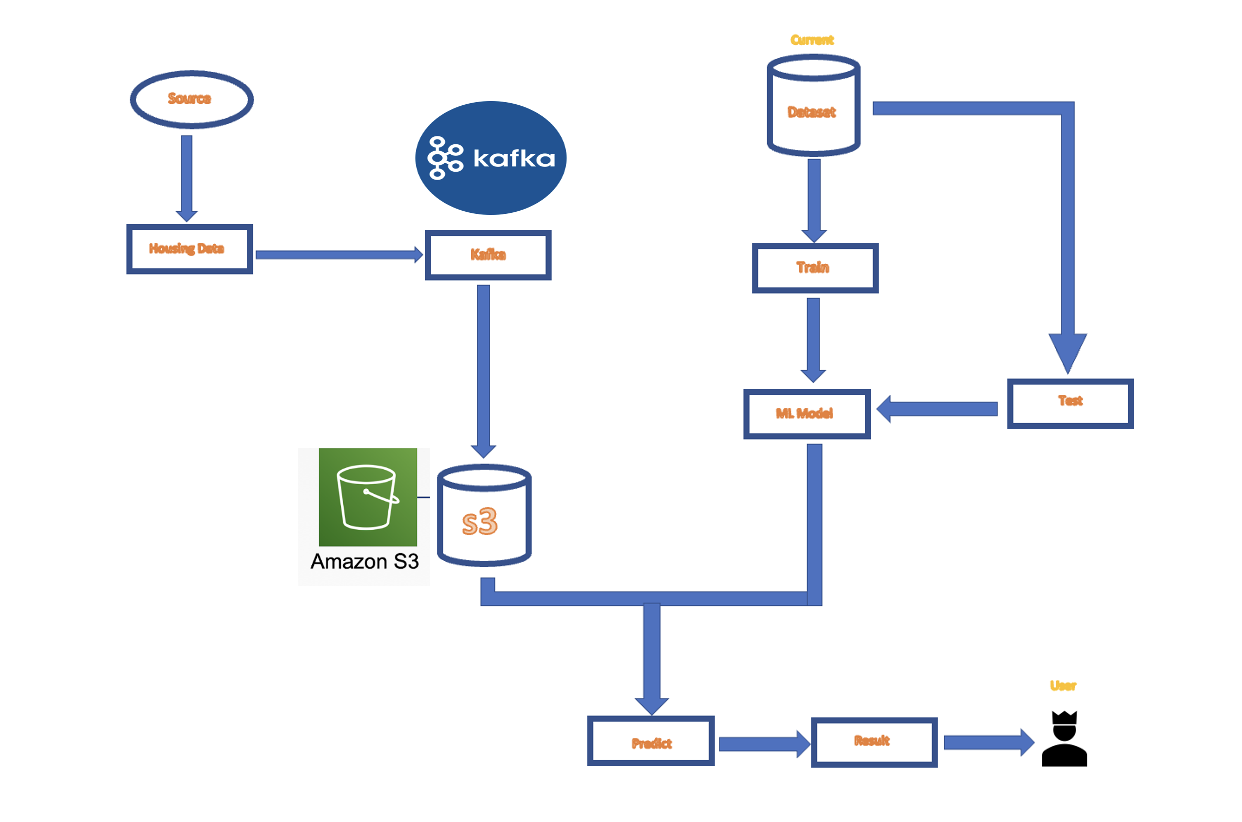


In this project, we have used and proposed architecture that is scalable and big data compliant. The data which we have used for the overall analysis is reported by just seattle residents. People are less active and busy with there jobs . when it comes to house searching and finding a best house as by considering the requirements ,it will be a huge task to spend the remaining time on searching for a house , They need a website which helps them to search only few areas in the whole city   So, to get a significant count of areas  and solve this problem, we can create a website to ease the process of reporting the few areas.
The technology architecture shown below can be used in situations where we are predicting the houses across all over the areas.
1. **Input Data Source:**This dataset will use the "Seattle House sales prices" from the Kaggle website.This dataset offers great opportunities for learning. The task for this dataset wil be to predict house sales prices based on several features available in the dataset. This dataset contains around 21613 rows and 21 columns (features).

2. **Apache Kafka:**
Apache Kafka is generally used to build real-time streaming data pipelines and applications that adapt to the data streams. It combines messaging, storage, and stream processing to allow storage and analysis of both historical and real-time data.
As shown in the architecture diagram, our input data is passed to Apache Kafka. End users like us will push the data to the Apache Kafka Broker (Queue). Kafka can handle a lot of real-time data and will act as middleware. Datastores of different agencies (in our case - the Department of Health and Mental Hygiene) and Apache spark will subscribe to data as per need. They will act as consumers who will query data as per topic.
3. **Apache Spark:**
Spark is the heart of the processing in this architecture. The in-memory computation of spark enables fast computation for large datasets. In the scalable environment, we can expect thousands and millions of reports coming in every day, and spark is able to handle all the operations from pre-processing to publishing this data. The data filtered by using Spark processing is used for reporting and monitoring.
4. **Target Data Store(s3 bucket):**
Target Datastores will subscribe to the Kafka broker to store data into the databases. The data store can be any relational database like PostgreSQL, NoSQl or a distributed storage system. These can be owned by different agencies of different cities interested in subscribing and collecting data.
5.  **Result:** Data monitoring and visualization as been seen in the Result ,it is very important in our project. Tools like Plotly, Folium can be used to show relevant information to the end-user. This visualization is useful when someone is moving to city, it is important to know the areas to find out the house to buy before moving to the new area ,They can monitor and view the data which will give them meaningful information.



## **Importing all required libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyspark_dist_explore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import urllib.parse

In [ ]:
from pyspark.ml.feature import *
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.sql.types import *
from pyspark.sql.functions import udf, col
from pyspark.sql.types import DoubleType
import pyspark.sql.functions as F



from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import *

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

openjdk-8-jdk-headless is already the newest version (8u352-ga-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark  = SparkSession.builder.appName('Dataframe').getOrCreate()

## **Dataset Description:**

This dataset will use the "Seattle House sales prices" from the Kaggle website.This dataset offers great opportunities for learning. The task for this dataset wil be to predict house sales prices based on several features available in the dataset. This dataset contains around 21613 rows and 21 columns (features).


The entire dataset can be viewed and downloaded here:

https://www.kaggle.com/code/zhikangtan/seattle-house-sales-price-analysis/data?select=house_sales.csv


## **Big Picture:**

You are asked to build a machine learning model that predicts the house sales rate according to the selected features. This data has metrics like price, bedrooms, area of the plot, year built, price for houses in Seattle.

### Frame the problem:

Is it supervised, unsupervised or reinforcement learning ? Is it a classification task, a regression task or something different ? Our problem is clearly a supervised learning task, because we have labeled ouput data. It is also clearly a regression task since you have to predict a numeric value.

### What is supervised learning?
Defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately. As input data is fed into the model, it adjusts its weights until the model has been fitted appropriately, which occurs as part of the cross validation process. Supervised learning helps organizations solve for a variety of real-world problems at scale, such as classifying spam in a separate folder from your inbox.
Supervised learning uses a training set to teach models to yield the desired output. This training dataset includes inputs and correct outputs, which allow the model to learn over time. The algorithm measures its accuracy through the loss function, adjusting until the error has been sufficiently minimized.
Supervised learning can be separated into two types of problems are Classification,Regression .
 

### What is regression?
Regression is used to understand the relationship between dependent and independent variables. It is commonly used to make projections, such as for sales revenue for a given business. Linear regression, logistical regression, and polynomial regression are popular regression algorithms.


##**Load the data:**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/house_sales.csv")

In [ ]:
spark.createDataFrame(df).show()

+----------+---------------+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|           date|  price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+---------------+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520|20141013T000000| 221900|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192|20141209T000000| 538000|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      2170|          400|    1951

### Each row represents one entry of a particular house. The dataset has 21 attributes: id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade,	sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat (latitude),	long (longitude),	sqft_living15, sqft_lot15



## **Data Pre-processing:** Preparing data for analysis

### Since all of our columns are integer values, we are converting it's datatype to numeric for making mathematical analysis easier.

In [ ]:
df[['price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15']] = df[['price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15']].apply(pd.to_numeric)

### **Drop the columns:**
### Some columns are not relevant to our analysis, so we will drop some of then now, others may be droppped as we go ahead in analysis. We should identify which ones of these columns to drop, from our dataframe. When building a machine learning models, columns/features are removed if they are redundant or doesn’t contribute to the model. The most common way to remove a column is using df.drop()


In [ ]:
df = df.drop(columns = ['id','date', 'sqft_above',	'yr_renovated', 'sqft_living15','sqft_lot15'])
spark.createDataFrame(df).show()

+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+-------+-------+--------+
|  price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_basement|yr_built|zipcode|    lat|    long|
+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+-------+-------+--------+
| 221900|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|            0|    1955|  98178|47.5112|-122.257|
| 538000|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|          400|    1951|  98125| 47.721|-122.319|
| 180000|       2|      1.0|        770|   10000|   1.0|         0|   0|        3|    6|            0|    1933|  98028|47.7379|-122.233|
| 604000|       4|      3.0|       1960|    5000|   1.0|         0|   0|        5|    7|          910|    1965|  98136|47.5208|-122.393|
| 510000|       3|      2.0|       1680| 

## Computing Age of the property:
### We know the year the house was build from the yr_built column in the dataframe, so we can compute the age by subtracting each entry in this column with 2022.

In [ ]:
df["age"] = df["yr_built"].subtract(2022).multiply(-1)

In [ ]:
spark.createDataFrame(df).show()

+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+-------+-------+--------+---+
|  price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_basement|yr_built|zipcode|    lat|    long|age|
+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+-------+-------+--------+---+
| 221900|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|            0|    1955|  98178|47.5112|-122.257| 67|
| 538000|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|          400|    1951|  98125| 47.721|-122.319| 71|
| 180000|       2|      1.0|        770|   10000|   1.0|         0|   0|        3|    6|            0|    1933|  98028|47.7379|-122.233| 89|
| 604000|       4|      3.0|       1960|    5000|   1.0|         0|   0|        5|    7|          910|    1965|  98136|47.5208|-122.393| 57|
| 510000|    

In [ ]:
data=spark.createDataFrame(df) 

## **Dataset Schema:**

In [ ]:
data.printSchema()

root
 |-- price: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: long (nullable = true)
 |-- sqft_lot: long (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: long (nullable = true)
 |-- view: long (nullable = true)
 |-- condition: long (nullable = true)
 |-- grade: long (nullable = true)
 |-- sqft_basement: long (nullable = true)
 |-- yr_built: long (nullable = true)
 |-- zipcode: long (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- age: long (nullable = true)



### Below you can see the top 5 rows of the dataset with the "show".

In [ ]:
data.show(5)

+------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+-------+-------+--------+---+
| price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_basement|yr_built|zipcode|    lat|    long|age|
+------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+-------+-------+--------+---+
|221900|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|            0|    1955|  98178|47.5112|-122.257| 67|
|538000|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|          400|    1951|  98125| 47.721|-122.319| 71|
|180000|       2|      1.0|        770|   10000|   1.0|         0|   0|        3|    6|            0|    1933|  98028|47.7379|-122.233| 89|
|604000|       4|      3.0|       1960|    5000|   1.0|         0|   0|        5|    7|          910|    1965|  98136|47.5208|-122.393| 57|
|510000|       3|   

In [ ]:
data.columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'age']

In [ ]:
data.printSchema()

root
 |-- price: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: long (nullable = true)
 |-- sqft_lot: long (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: long (nullable = true)
 |-- view: long (nullable = true)
 |-- condition: long (nullable = true)
 |-- grade: long (nullable = true)
 |-- sqft_basement: long (nullable = true)
 |-- yr_built: long (nullable = true)
 |-- zipcode: long (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- age: long (nullable = true)



## **Describe()**: To show a summary of each attributes:

In [ ]:
data.select('bedrooms').describe().show()

+-------+------------------+
|summary|          bedrooms|
+-------+------------------+
|  count|             21613|
|   mean|  3.37084162309721|
| stddev|0.9300618311474523|
|    min|                 0|
|    max|                33|
+-------+------------------+



In [ ]:
data.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             21613|
|   mean| 50.99486420210059|
| stddev|29.373410802386562|
|    min|                 7|
|    max|               122|
+-------+------------------+



In [ ]:
data.select(['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'age']).describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+-------------------+-------------------+------------------+
|summary|            price|          bedrooms|         bathrooms|       sqft_living|          sqft_lot|            floors|          waterfront|               view|         condition|             grade|     sqft_basement|          yr_built|          zipcode|                lat|               long|               age|
+-------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+-------------------+-------------------+------------------+
|  count|            21613|             21613|   

In [ ]:
data.select(['price','bedrooms','bathrooms','sqft_living','age']).describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+
|summary|            price|          bedrooms|         bathrooms|       sqft_living|               age|
+-------+-----------------+------------------+------------------+------------------+------------------+
|  count|            21613|             21613|             21613|             21613|             21613|
|   mean|540088.1419053348|  3.37084162309721|2.1147573219821405|2079.8997362698374| 50.99486420210059|
| stddev|367127.1959683635|0.9300618311474523| 0.770163157217741| 918.4408970468107|29.373410802386562|
|    min|            75000|                 0|               0.0|               290|                 7|
|    max|          7700000|                33|               8.0|             13540|               122|
+-------+-----------------+------------------+------------------+------------------+------------------+



## **COUNT()**: Counting the number of rows.

In [ ]:
data.count()

21613

### The count, mean, min and max rows are self explanatory. Be aware of the fact that, as of now, all null values are ignored here because we have not checked for null values yet. (total no of properties is 21613 ). 

## **Dealing with Missing Values:**

### Null values are considered as empty or missing data. An important step in preparing the dataset involves removing missing or NaN values. In most cases, the terms missing and null are either dropped, ignored or replaced with another value such as mean (average). This Missing value can affect the performance and results of the machine learning models and/or reduce the accuracy of the model.


In [ ]:
#Check any missing value
for column in data.columns:
    print(column, data.filter(col(column).cast("float").isin([None,np.nan])).count())

price 0
bedrooms 0
bathrooms 0
sqft_living 0
sqft_lot 0
floors 0
waterfront 0
view 0
condition 0
grade 0
sqft_basement 0
yr_built 0
zipcode 0
lat 0
long 0
age 0


### From the Above we can see that there are no null values in the data. So, there is no need to assign or drop any values. But in case of any rows containing NaN values, the are dropped by doing the following: **data.na.drop()**

In [ ]:
data.na.drop()

DataFrame[price: bigint, bedrooms: bigint, bathrooms: double, sqft_living: bigint, sqft_lot: bigint, floors: double, waterfront: bigint, view: bigint, condition: bigint, grade: bigint, sqft_basement: bigint, yr_built: bigint, zipcode: bigint, lat: double, long: double, age: bigint]

## **df.dtypes** : Returns the dtypes in the DataFrame.

In [ ]:
a = pd.DataFrame(data.dtypes, columns = ['Column Name','Data type'])
spark.createDataFrame(a).show()

+-------------+---------+
|  Column Name|Data type|
+-------------+---------+
|        price|   bigint|
|     bedrooms|   bigint|
|    bathrooms|   double|
|  sqft_living|   bigint|
|     sqft_lot|   bigint|
|       floors|   double|
|   waterfront|   bigint|
|         view|   bigint|
|    condition|   bigint|
|        grade|   bigint|
|sqft_basement|   bigint|
|     yr_built|   bigint|
|      zipcode|   bigint|
|          lat|   double|
|         long|   double|
|          age|   bigint|
+-------------+---------+



In [ ]:
#Checking if the prices are normally distributed
data.select(F.skewness('price'), F.kurtosis('price')).show()

+-----------------+-----------------+
|  skewness(price)|  kurtosis(price)|
+-----------------+-----------------+
|4.023789835939301|34.57726217115535|
+-----------------+-----------------+



### Kurtosis value tells us if the distrubution is peaked or normalised. A value of 34 is very likely to indicate a peak. Let's visualise this with a graph.

# **Explorartory Analysis**

## **Distplot**

### Distplot depicts the variation in the data distribution and the overall distribution of continuous data variables. This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots.

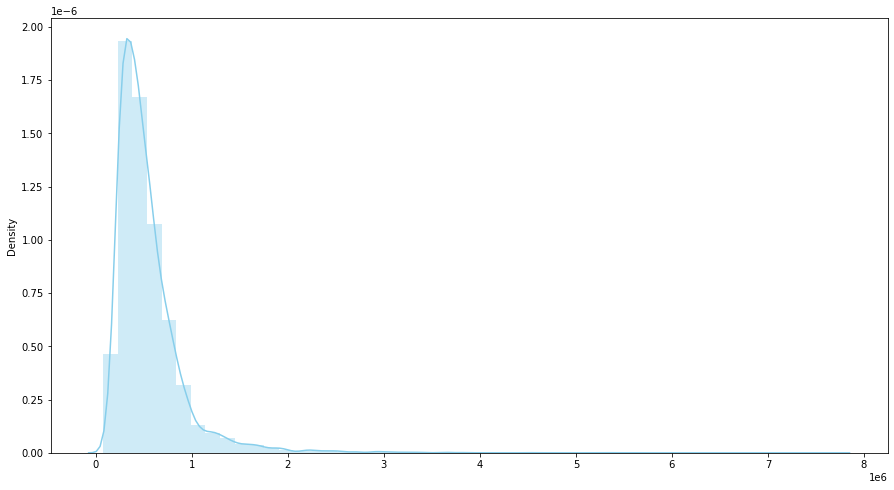

In [ ]:
plt.figure(figsize = (15, 8))
sns.distplot(data.select('price').toPandas(), color="skyblue")

### Turns out we were right about the peak!

In [ ]:
df['price_bins'] = pd.cut(df['price'], bins=[0,449999,450000,7700000], labels=['under_median','median','above_median'])

In [ ]:
df['price_bins'].value_counts()

above_median    10749
under_median    10692
median            172
Name: price_bins, dtype: int64

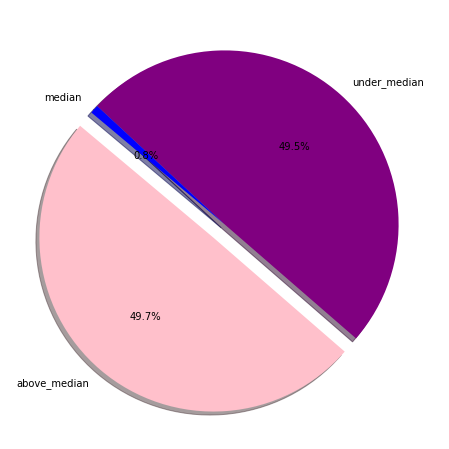

In [ ]:
labels = 'above_median', 'under_median','median'
sizes = [10749, 10692, 172]
colors = ['pink', 'purple','blue']
explode = (0.1, 0, 0)
plt.figure(figsize=(15,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [ ]:
print("No of houses: %i" % data.select('price').count())

No of houses: 21613


## DataFrame Manipulation

In [ ]:
print("No of houses that cost greater than $350000 are: %i" % data.filter(data["price"] > 350000).count())
data.where(data.price > "350000").show()

No of houses that cost greater than $350000 are: 14816
+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+-------+-------+--------+---+
|  price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_basement|yr_built|zipcode|    lat|    long|age|
+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+-------+-------+--------+---+
| 538000|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|          400|    1951|  98125| 47.721|-122.319| 71|
| 604000|       4|      3.0|       1960|    5000|   1.0|         0|   0|        5|    7|          910|    1965|  98136|47.5208|-122.393| 57|
| 510000|       3|      2.0|       1680|    8080|   1.0|         0|   0|        3|    8|            0|    1987|  98074|47.6168|-122.045| 35|
|1225000|       4|      4.5|       5420|  101930|   1.0|         0|   0|        3|   11|         15

In [ ]:
print("No of houses that cost greater than $1000000 are: %i" % data.filter(data["price"] > 1000000).count())
data.where(data.price > "1000000").show()

No of houses that cost greater than $1000000 are: 1465
+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+-------+-------+--------+---+
|  price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_basement|yr_built|zipcode|    lat|    long|age|
+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+-------+-------+--------+---+
|1225000|       4|      4.5|       5420|  101930|   1.0|         0|   0|        3|   11|         1530|    2001|  98053|47.6561|-122.005| 21|
|2000000|       3|     2.75|       3050|   44867|   1.0|         0|   4|        3|    9|          720|    1968|  98040|47.5316|-122.233| 54|
|1350000|       3|      2.5|       2753|   65005|   1.0|         1|   2|        5|    9|          588|    1953|  98070|47.4041|-122.451| 69|
|1325000|       5|     2.25|       3200|   20158|   1.0|         0|   0|        3|    8|         16

In [ ]:
print("Total No of houses: %i" % data.select('price').count())
print("No of houses older than 20 years are: %i" % data.filter(data["age"] > 20).count())
print("No of houses older than 50 years are: %i" % data.filter(data["age"] > 50).count())
print("No of houses older than 100 years are: %i" % data.filter(data["age"] > 100).count())

Total No of houses: 21613
No of houses older than 20 years are: 17377
No of houses older than 50 years are: 10285
No of houses older than 100 years are: 1625


In [ ]:
data.createOrReplaceTempView("hou")
summ = spark.sql(""" SELECT bedrooms, count(*) 
                      as count_bedrooms 
                    FROM hou GROUP BY bedrooms """)
summ.show()

+--------+--------------+
|bedrooms|count_bedrooms|
+--------+--------------+
|       0|            13|
|       7|            38|
|       6|           272|
|       9|             6|
|       5|          1601|
|       1|           199|
|       3|          9824|
|       8|            13|
|      11|             1|
|       2|          2760|
|       4|          6882|
|      33|             1|
|      10|             3|
+--------+--------------+



In [ ]:
s1 = spark.sql(""" SELECT price, bedrooms, bathrooms, lat, long, age FROM hou WHERE age>20 and price<1000000""")
print("No of houses meeting requirements", s1.count())
s1.show()

No of houses meeting requirements 16283
+------+--------+---------+-------+--------+---+
| price|bedrooms|bathrooms|    lat|    long|age|
+------+--------+---------+-------+--------+---+
|221900|       3|      1.0|47.5112|-122.257| 67|
|538000|       3|     2.25| 47.721|-122.319| 71|
|180000|       2|      1.0|47.7379|-122.233| 89|
|604000|       4|      3.0|47.5208|-122.393| 57|
|510000|       3|      2.0|47.6168|-122.045| 35|
|257500|       3|     2.25|47.3097|-122.327| 27|
|291850|       3|      1.5|47.4095|-122.315| 59|
|229500|       3|      1.0|47.5123|-122.337| 62|
|662500|       3|      2.5|47.6007|-122.145| 57|
|468000|       2|      1.0|  47.69|-122.292| 80|
|310000|       3|      1.0|47.7558|-122.229| 95|
|400000|       3|     1.75|47.6127|-122.045| 45|
|530000|       5|      2.0|  47.67|-122.394|122|
|650000|       4|      3.0|47.5714|-122.375| 43|
|395000|       3|      2.0|47.7277|-121.962| 28|
|485000|       4|      1.0|47.6648|-122.343|106|
|189000|       2|      1.0|47

In [ ]:
s2 = spark.sql(""" SELECT price, bedrooms, bathrooms, lat, long, age FROM hou WHERE bedrooms between 2 and 3 and price<90000""")
print("No of houses meeting requirements", s2.count())
s2.show()

No of houses meeting requirements 10
+-----+--------+---------+-------+--------+---+
|price|bedrooms|bathrooms|    lat|    long|age|
+-----+--------+---------+-------+--------+---+
|82500|       2|      1.0|47.4799|-122.296| 71|
|84000|       2|      1.0|47.4752|-122.271| 73|
|89000|       3|      1.0|47.3026|-122.363| 53|
|82000|       3|      1.0|47.4987|-122.341| 68|
|85000|       2|      1.0|47.3813|-122.243| 83|
|86500|       3|      1.0|47.3277|-122.341| 62|
|78000|       2|      1.0|47.4739| -122.28| 80|
|81000|       2|      1.0|47.4808|-122.315| 79|
|85000|       2|      1.0|47.3897|-122.236| 75|
|83000|       2|      1.0|47.4727| -122.27|104|
+-----+--------+---------+-------+--------+---+



In [ ]:
s3 = spark.sql(""" SELECT price, bedrooms, bathrooms, lat, long, age 
FROM hou WHERE age between 20 and 25 and price between 800000 and 900000 
and bedrooms = 3 and bathrooms = 2.5""")
print("No of houses meeting requirements", s3.count())
s3.show()

No of houses meeting requirements 16
+------+--------+---------+-------+--------+---+
| price|bedrooms|bathrooms|    lat|    long|age|
+------+--------+---------+-------+--------+---+
|900000|       3|      2.5|47.6012|-122.023| 22|
|822500|       3|      2.5|47.6868|-122.108| 23|
|843500|       3|      2.5|47.7126|-122.104| 25|
|900000|       3|      2.5|47.5709|-122.408| 25|
|859000|       3|      2.5|47.3809| -122.13| 23|
|817250|       3|      2.5|47.6769|-122.177| 23|
|807000|       3|      2.5| 47.659|-122.398| 22|
|865000|       3|      2.5|47.6549|-122.089| 25|
|820000|       3|      2.5| 47.664|-122.041| 25|
|825000|       3|      2.5|47.5489|-122.007| 20|
|815000|       3|      2.5|47.5611|-122.032| 21|
|805000|       3|      2.5| 47.654|-122.088| 25|
|898000|       3|      2.5|47.5539|-122.103| 25|
|819000|       3|      2.5|47.4376|-122.456| 22|
|839000|       3|      2.5|47.7614|-122.015| 22|
|812000|       3|      2.5|47.6156|-122.295| 24|
+------+--------+---------+-----

In [ ]:
s4 = spark.sql(""" SELECT price, bedrooms, bathrooms, lat, long, age 
FROM hou WHERE bedrooms = 0""")
print("No of Studio Apartments (0) bedrooms):", s4.count())
s4.show()

No of Studio Apartments (0) bedrooms): 13
+-------+--------+---------+-------+--------+---+
|  price|bedrooms|bathrooms|    lat|    long|age|
+-------+--------+---------+-------+--------+---+
|1095000|       0|      0.0|47.6362|-122.322| 32|
| 380000|       0|      0.0|47.7145|-122.356| 16|
| 288000|       0|      1.5|47.7222| -122.29| 23|
| 228000|       0|      1.0| 47.526|-122.261| 69|
|1295648|       0|      0.0|47.6642|-122.069| 32|
| 339950|       0|      2.5|47.3473|-122.151| 37|
| 240000|       0|      2.5|47.3493|-122.053| 19|
| 355000|       0|      0.0|47.4095|-122.168| 32|
| 235000|       0|      0.0|47.5265|-121.828| 26|
| 320000|       0|      2.5|47.5261|-121.826| 23|
| 139950|       0|      0.0|47.2781| -122.25|109|
| 265000|       0|     0.75|47.4177|-122.491| 19|
| 142000|       0|      0.0|47.5308|-121.888| 59|
+-------+--------+---------+-------+--------+---+



In [ ]:
print("No of houses close to the ocean: %i" % data.filter(data["waterfront"] == "1").count())

No of houses close to the ocean: 163


## **Histogram plot:** 
### Another good way to explore a given dataset is to plot a histogrom of each numerical attribute. A histogram shows you the number of instances (vertical axes) and the number of the given value range (horizontal axes)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6d8417850>,
      dtype=object)

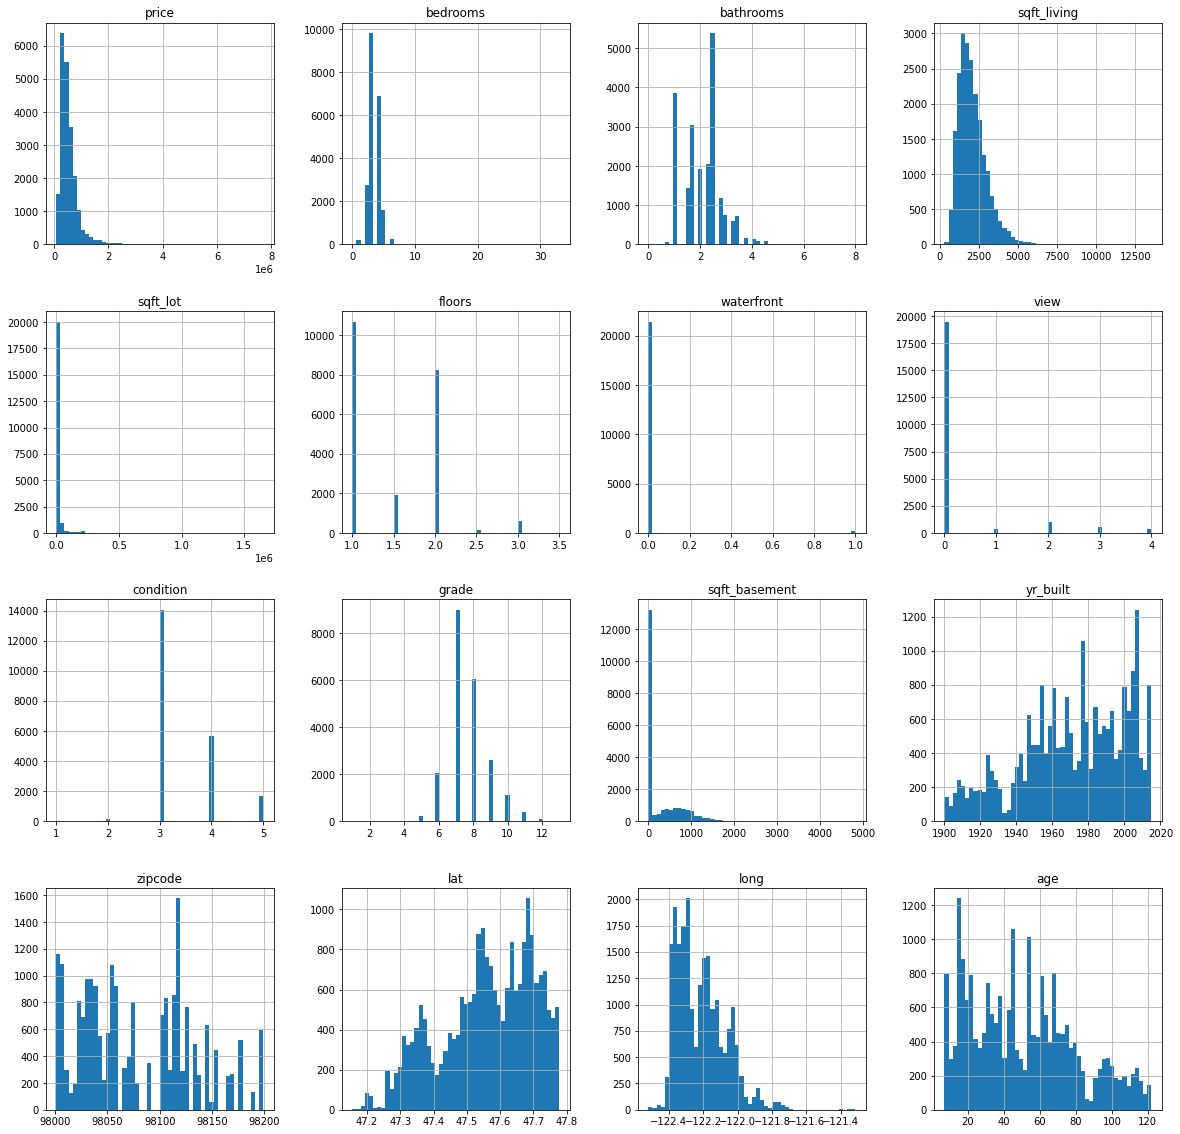

In [ ]:
%matplotlib inline

df.hist(bins=50, figsize=(20, 20))

### **What you should notice about the histograms above:**


*   The attributes have varying scales, which we will discuss later on in this post.
*   Many of the histograms are "tail heavy" which means that they extend further to the right of the median than to the left which makes it harder for an algortihm to detect patterns. We will transform the later on.
*   The median_income attribute is not in US Dollar because the data has been scaled and capped at 15.0001 and at 0.4999. This is called a "preprocessed attribute" and is common within machine learning, but you should understand how the data was preprocessed.














## **Seaborn:**

### Seaborn is an amazing visualization library for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive. It is built on the top of matplotlib library and also closely integrated into the data structures from pandas.

### This function can normalize the statistic computed within each bin to estimate frequency, density or probability mass, and it can add a smooth curve obtained using a kernel density estimate.

### The choice of bins for computing and plotting a histogram can exert substantial influence on the insights that one is able to draw from the visualization. If the bins are too large, they may erase important features. On the other hand, bins that are too small may be dominated by random variability, obscuring the shape of the true underlying distribution. The default bin size is determined using a reference rule that depends on the sample size and variance. This works well in many cases, (i.e., with “well-behaved” data) but it fails in others. It is always a good to try different bin sizes to be sure that you are not missing something important. This function allows you to specify bins in several different ways, such as by setting the total number of bins to use, the width of each bin, or the specific locations where the bins should break.



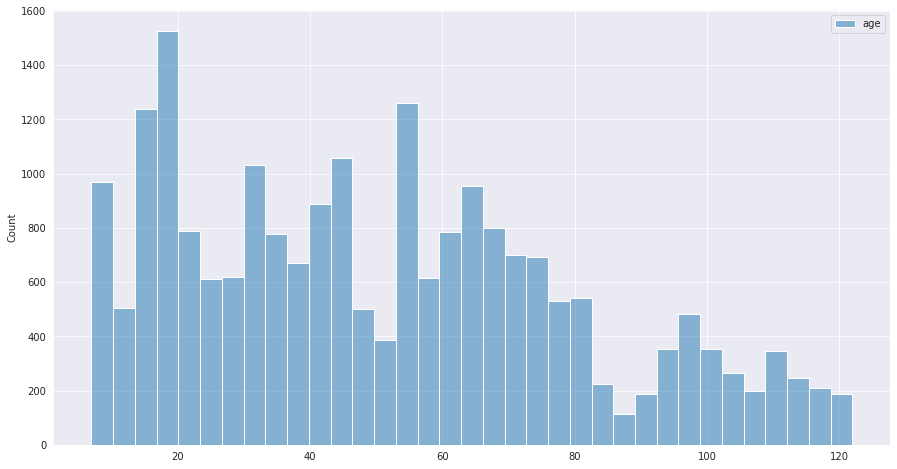

In [ ]:
#Distribution of houses by age
plt.figure(figsize = (15, 8))
sns.set_style("darkgrid")
sns.histplot(data.select('age').toPandas())

## **Scatterplot**

### Scatterplot can be used with several semantic groupings which can help to understand well in a graph. They can plot two-dimensional graphics that can be enhanced by mapping up to three additional variables while using the semantics of hue, size, and style parameters. All the parameter control visual semantic which are used to identify the different subsets. Using redundant semantics can be helpful for making graphics more accessible.
 

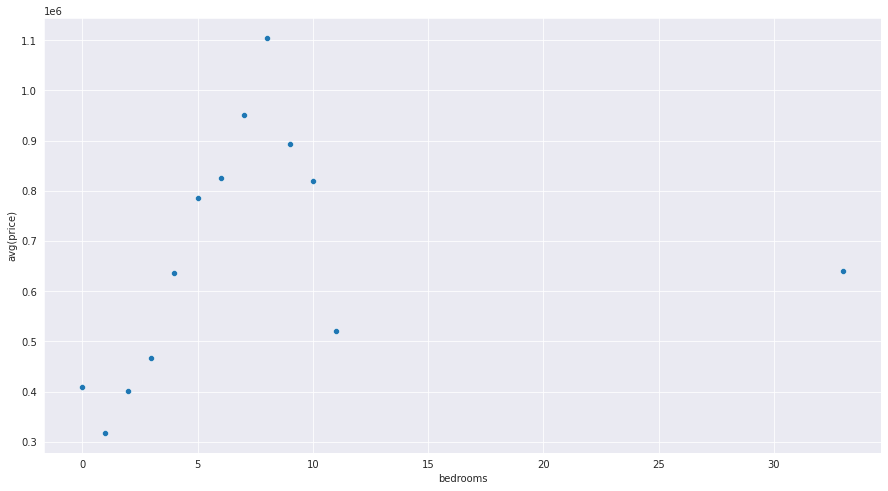

In [ ]:
#Average price of house by bedrooms
df1 = data.groupby('bedrooms').avg().sort('bedrooms').select(['bedrooms','avg(price)'])
df_p = df1.toPandas()
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df_p['bedrooms'], y = df_p['avg(price)'] )

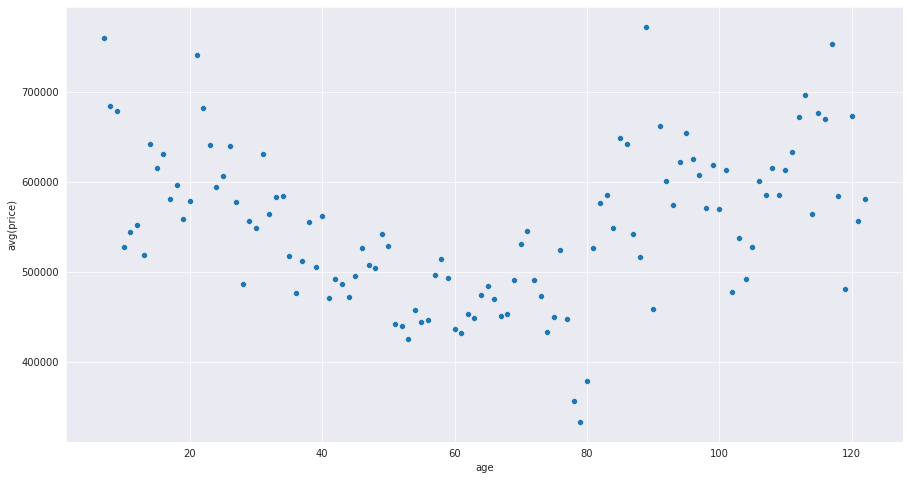

In [ ]:
#Average price of house by age
df1 = data.groupby('age').avg().sort('age').select(['age','avg(price)'])
df_p = df1.toPandas()
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df_p['age'], y = df_p['avg(price)'] )

[(0.0, 7000.0)]

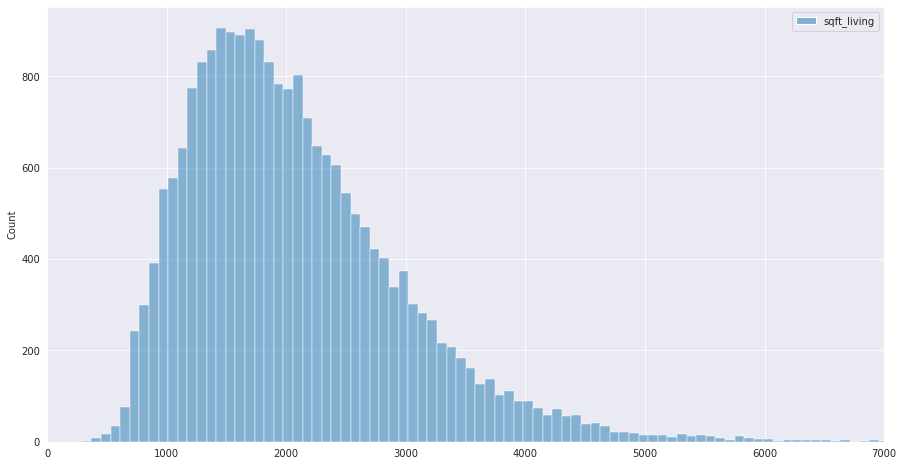

In [ ]:
plt.figure(figsize = (15, 8))
g = sns.histplot(data.select('sqft_living').toPandas())
g.set(xlim = (0, 7000))


The xlim() function in pyplot module of matplotlib library is used to get or set the x-limits of the current axes.

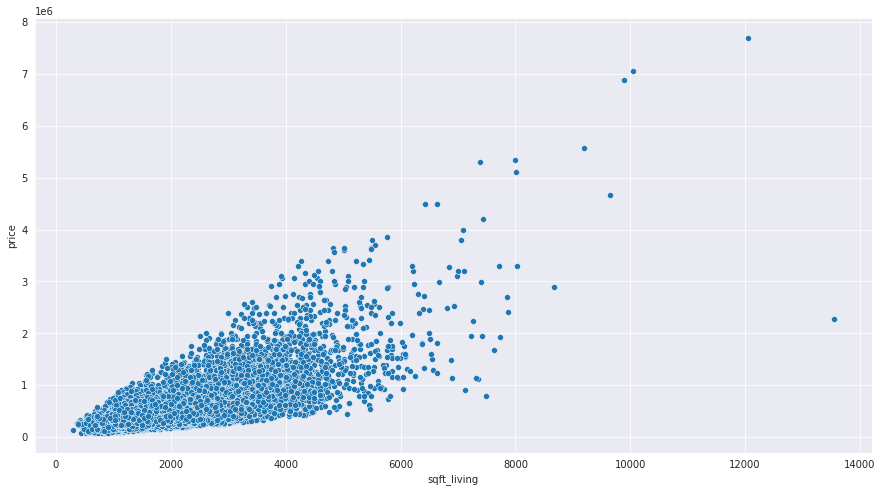

In [ ]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df['sqft_living'], y = df['price'])

[(0.0, 8.0)]

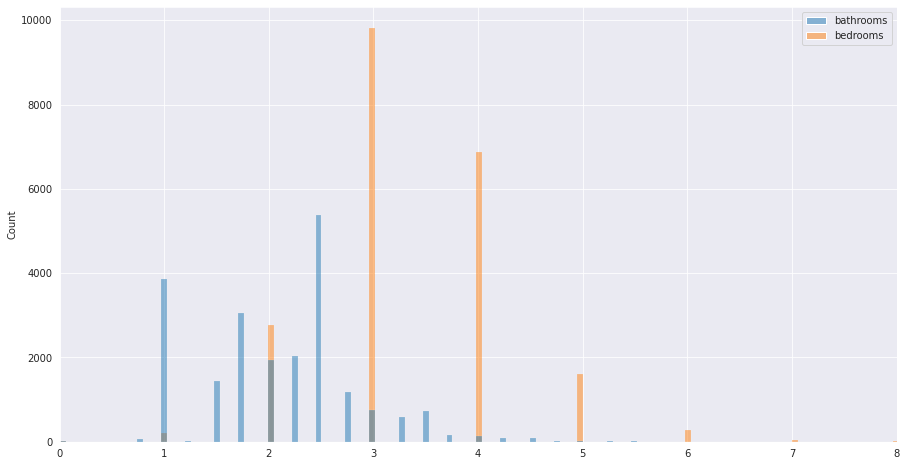

In [ ]:
plt.figure(figsize = (15, 8))
sns.set_style("darkgrid")
f= sns.histplot(data.select('bathrooms', 'bedrooms').toPandas())
f.set(xlim = (0, 8))

Above graph shows we choosen seaborn library to get the histplot on count.

[(0.0, 12.0)]

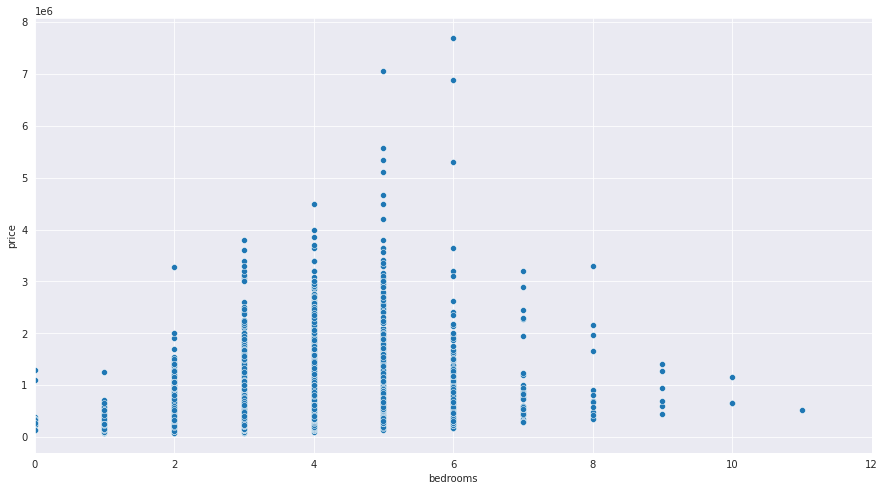

In [ ]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df['bedrooms'], y = df['price']).set(xlim = (0,12))

The above graph shown Passing long-form data and assigning x and y will draw a scatter plot between two variables .Here, On X axis  choosen 'bedrooms' and on Y axis  choosen 'price'.

[(0.0, 12.0)]

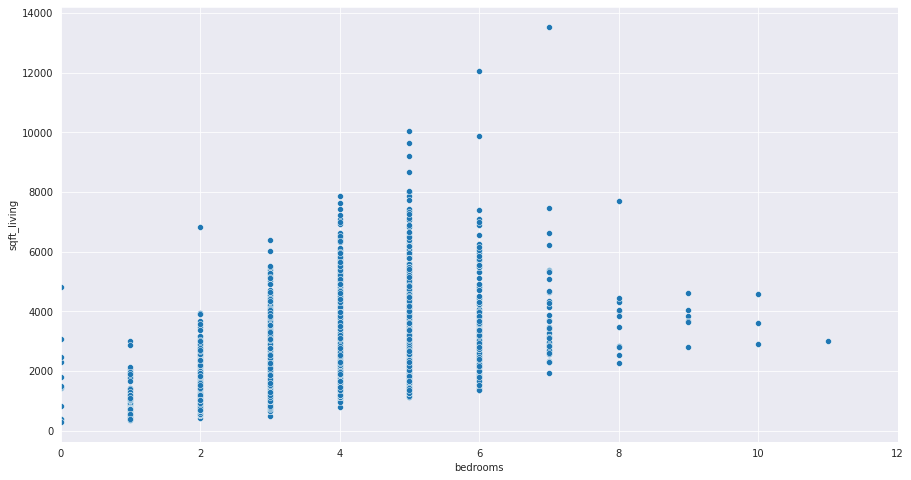

In [ ]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df['bedrooms'], y = df['sqft_living']).set(xlim = (0,12))

The above graph shown Passing long-form data and assigning x and y will draw a scatter plot between two variables .Here, On X axis  choosen 'bedrooms' and on Y axis  choosen  'sqft_living'.

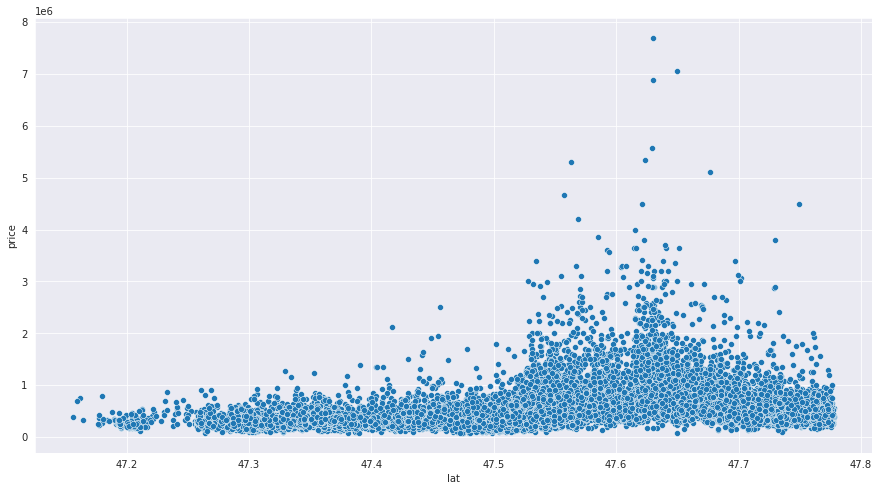

In [ ]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df['lat'], y = df['price'])

**3D Scatter Plot:**

A 3D Scatter Plot is a mathematical diagram, the most basic version of three-dimensional plotting used to display the properties of data as three variables of a dataset using the cartesian coordinates.

In [ ]:
plt.figure(figsize = (15, 8))
fig = px.scatter_3d(df, x='lat', y='long', z='price',
                    color='age',
                    title="coordinates vs price")
fig.show()

<Figure size 1080x576 with 0 Axes>

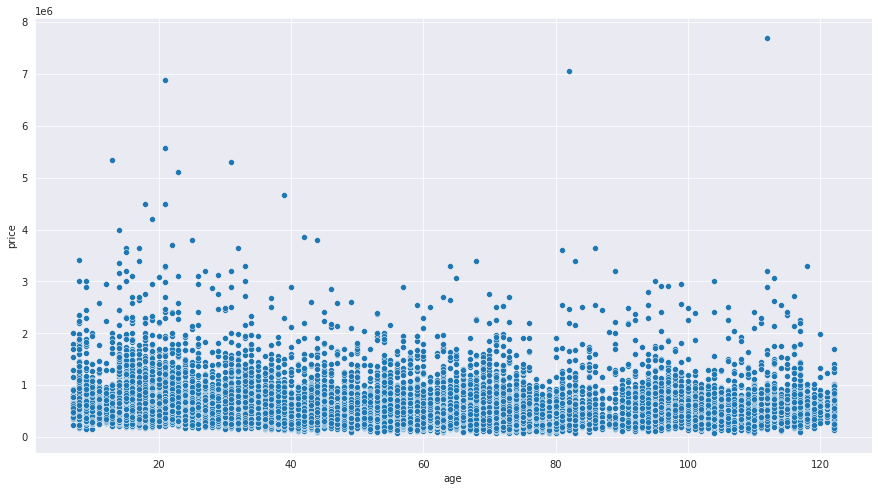

In [ ]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = df['age'], y = df['price'])

**Bar Plot**

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

For datasets where 0 is not a meaningful value, a point plot will allow you to focus on differences between levels of one or more categorical variables.

It is also important to keep in mind that a bar plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.



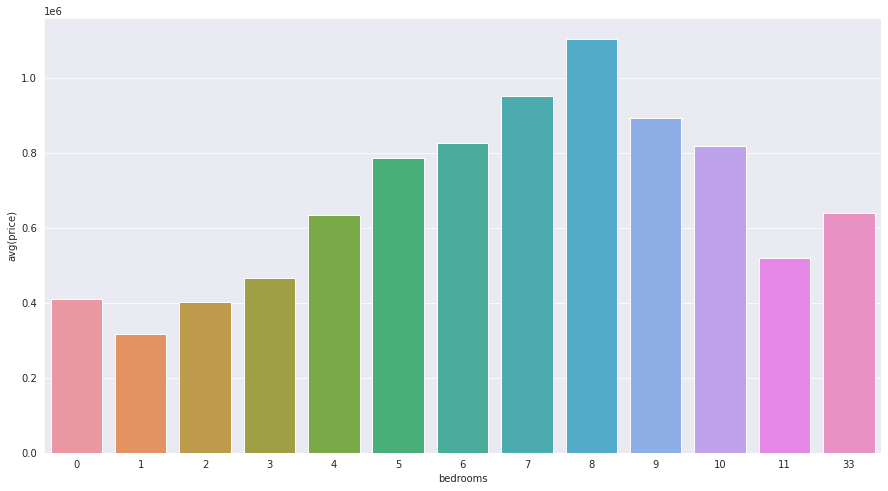

In [ ]:
plt.figure(figsize = (15, 8))
df_i = data.groupby('bedrooms').agg({'price' : 'avg'})
df_p = df_i.toPandas()
sns.barplot(x = df_p['bedrooms'], y = df_p['avg(price)'])

From the above graph shown the barplot where x-axis contain 'view' and y-axis contain 'aveg(price)'.here,Group by a categorical varaible and plot aggregated values, with confidence intervals.

**Label Encoding** 

refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [ ]:
#Label-encoding for the "ocean_proximity" column

indexer = StringIndexer(inputCol="waterfront", outputCol="ocean_proximity_index") 
data = indexer.fit(data).transform(data)
data = data.drop('waterfront')


Encode labels in column 'data '


used the "describe()" method to show a summary of the numerical attributes:

In [ ]:
data.select('ocean_proximity_index').describe().show()

+-------+---------------------+
|summary|ocean_proximity_index|
+-------+---------------------+
|  count|                21613|
|   mean| 0.007541757275713691|
| stddev|  0.08651719772788763|
|    min|                  0.0|
|    max|                  1.0|
+-------+---------------------+



In [ ]:
#Removing na values to ensure correlation method works properly
mean = data.select(F.mean('bedrooms')).collect()[0][0]
data = data.na.fill({'bedrooms': mean})

From the Above we will remove null values to ensure correlation method works properly

In [ ]:
#Checking if na values exist in 'total_bedrooms' columns
data.filter(col('bedrooms').isNull()).show()

+-----+--------+---------+-----------+--------+------+----+---------+-----+-------------+--------+-------+---+----+---+---------------------+
|price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|view|condition|grade|sqft_basement|yr_built|zipcode|lat|long|age|ocean_proximity_index|
+-----+--------+---------+-----------+--------+------+----+---------+-----+-------------+--------+-------+---+----+---+---------------------+
+-----+--------+---------+-----------+--------+------+----+---------+-----+-------------+--------+-------+---+----+---+---------------------+



From the above checked if na values exist in 'total_bedrooms' columns.

In [ ]:

# convert to vector column first
assembler = VectorAssembler(inputCols=data.columns, outputCol="features",handleInvalid='skip')
df_vector = assembler.transform(data).select("features")


**Seaborn** 
 Python library that is based on matplotlib and is used for data visualization. It provides a medium to present data in a statistical graph format as an informative and attractive medium to impart some information. 
 
 A heatmap is one of the components supported by seaborn where variation in related data is portrayed using a color palette.

**Correlation heatmap**


A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. 

The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. A correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily readable and comprehensible.

Except for data all other attributes are optional and data obviously will be the data to be plotted. The data here has to be passed with corr() method to generate a correlation heatmap. Also, corr() itself eliminates columns which will be of no use while generating a correlation heatmap and selects those which can be used.

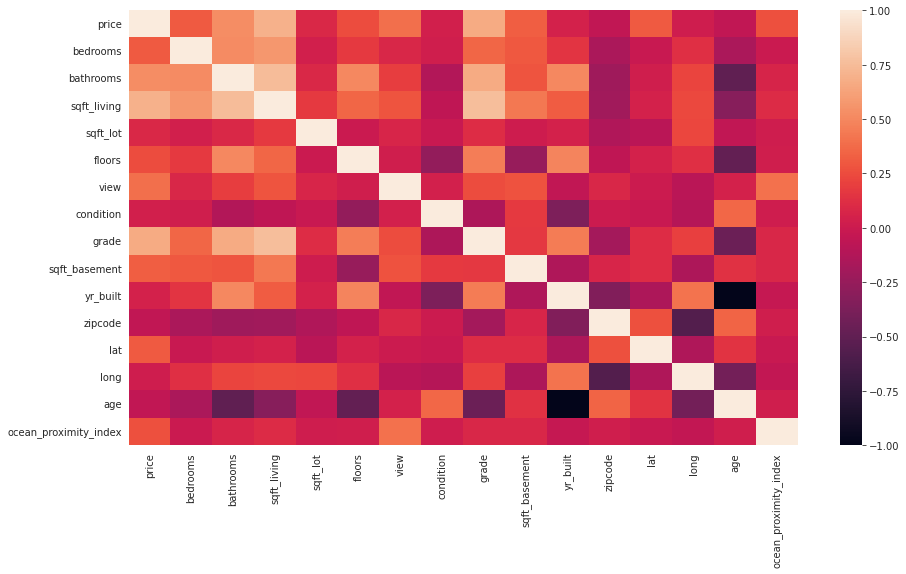

In [ ]:
matrix = Correlation.corr(df_vector, 'features')
corrmatrix = matrix.collect()[0][0].toArray().tolist()
plt.figure(figsize = (15, 8))
df_corr = pd.DataFrame(corrmatrix, columns = data.columns, index = data.columns)

#plot correlation matrix by using seaborn
sns.heatmap(df_corr)

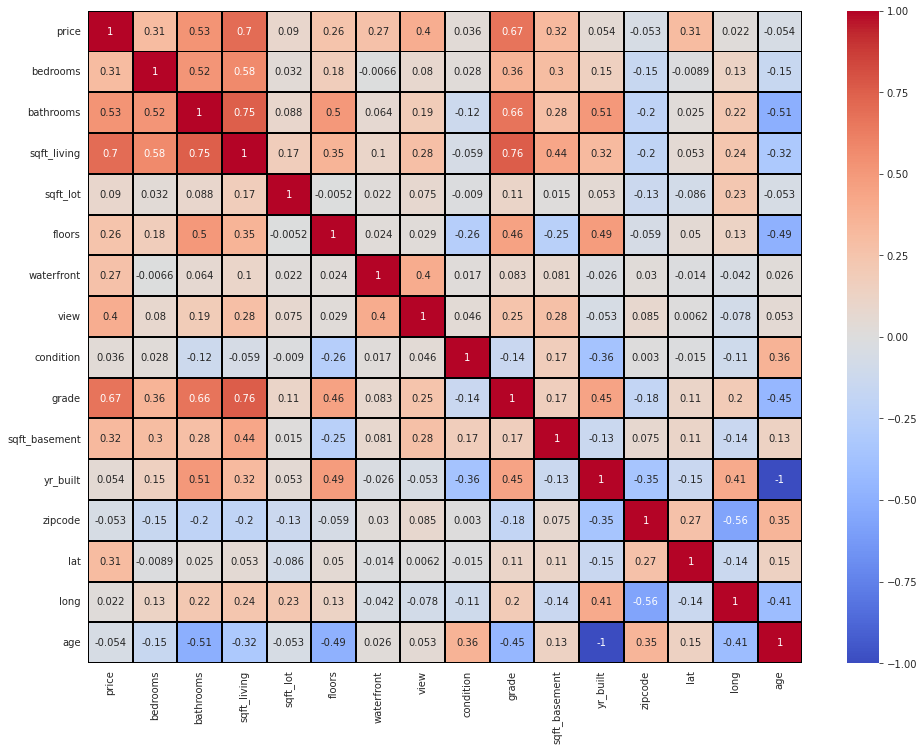

In [ ]:
#Correlation Matrix between all variables with values

corr_matrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linecolor='black', linewidths=1.0, xticklabels=True, yticklabels=True)
plt.show()

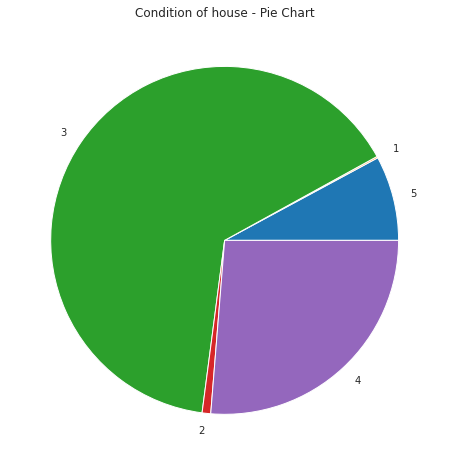

In [ ]:
condition = data.groupBy('condition').count().collect() 
# Creating dataset
condition_label = [item[0] for item in condition]
condition_count = [item[1] for item in condition]
# Creating plot
plt.figure(figsize = (15, 8))
plt.title("Condition of house - Pie Chart")
plt.pie(condition_count, labels = condition_label)
# show plot
plt.show()

In [ ]:
data.columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'age',
 'ocean_proximity_index']

In [ ]:
housing_model = data.select(['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'ocean_proximity_index',
 'condition',
 'grade',
 'sqft_basement',
 'lat',
 'long',
 'age','price'])
housing_model.show(3)

+--------+---------+-----------+--------+------+---------------------+---------+-----+-------------+-------+--------+---+------+
|bedrooms|bathrooms|sqft_living|sqft_lot|floors|ocean_proximity_index|condition|grade|sqft_basement|    lat|    long|age| price|
+--------+---------+-----------+--------+------+---------------------+---------+-----+-------------+-------+--------+---+------+
|       3|      1.0|       1180|    5650|   1.0|                  0.0|        3|    7|            0|47.5112|-122.257| 67|221900|
|       3|     2.25|       2570|    7242|   2.0|                  0.0|        3|    7|          400| 47.721|-122.319| 71|538000|
|       2|      1.0|        770|   10000|   1.0|                  0.0|        3|    6|            0|47.7379|-122.233| 89|180000|
+--------+---------+-----------+--------+------+---------------------+---------+-----+-------------+-------+--------+---+------+
only showing top 3 rows



+------------------+-------------------+
|     skewness(age)|      kurtosis(age)|
+------------------+-------------------+
|0.4697727924346768|-0.6575330263081298|
+------------------+-------------------+



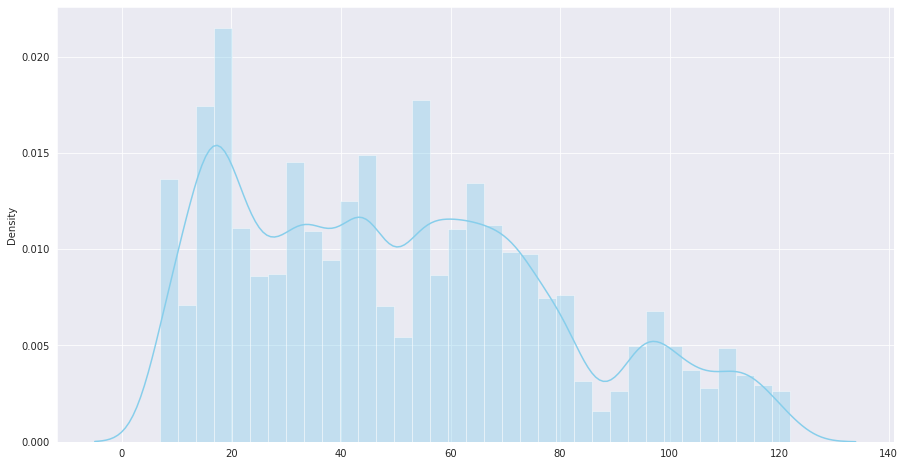

In [ ]:
#Checking distribution of selected fetures
plt.figure(figsize = (15, 8))

sns.distplot(data.select('age').toPandas(), color="skyblue")
data.select(F.skewness('age'), F.kurtosis('age')).show()

#is normally distributed

The **assembler** was used to collect all the vectorized array data into a single column and labeled them as “features” except the target label.



In [ ]:
#Assembling features
feature_assembly = VectorAssembler(inputCols = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'ocean_proximity_index',
 'condition',
 'grade',
 'sqft_basement',
 'lat',
 'long',
 'age'], outputCol = 'features')
output = feature_assembly.transform(housing_model)
output.show(3, truncate = False)

+--------+---------+-----------+--------+------+---------------------+---------+-----+-------------+-------+--------+---+------+-------------------------------------------------------------------+
|bedrooms|bathrooms|sqft_living|sqft_lot|floors|ocean_proximity_index|condition|grade|sqft_basement|lat    |long    |age|price |features                                                           |
+--------+---------+-----------+--------+------+---------------------+---------+-----+-------------+-------+--------+---+------+-------------------------------------------------------------------+
|3       |1.0      |1180       |5650    |1.0   |0.0                  |3        |7    |0            |47.5112|-122.257|67 |221900|[3.0,1.0,1180.0,5650.0,1.0,0.0,3.0,7.0,0.0,47.5112,-122.257,67.0]  |
|3       |2.25     |2570       |7242    |2.0   |0.0                  |3        |7    |400          |47.721 |-122.319|71 |538000|[3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,7.0,400.0,47.721,-122.319,71.0]|
|2       |1.0  

**Normalization** is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1

**StandardScaler**

transforms a dataset of Vector rows, normalizing each feature to have unit standard deviation and/or zero mean. It takes parameters:
withStd: True by default. Scales the data to unit standard deviation.
withMean: False by default. Centers the data with mean before scaling. It will build a dense output, so take care when applying to sparse input.
StandardScaler is an Estimator which can be fit on a dataset to produce a StandardScalerModel; this amounts to computing summary statistics. The model can then transform a Vector column in a dataset to have unit standard deviation and/or zero mean features.

In [ ]:
#Normalizing the features

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=False)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(output)

# Normalize each feature to have unit standard deviation.
scaledOutput = scalerModel.transform(output)
scaledOutput.show(3, truncate = False)

+--------+---------+-----------+--------+------+---------------------+---------+-----+-------------+-------+--------+---+------+-------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|bedrooms|bathrooms|sqft_living|sqft_lot|floors|ocean_proximity_index|condition|grade|sqft_basement|lat    |long    |age|price |features                                                           |scaledFeatures                                                                                                                                                                                                    |
+--------+---------+-----------+--------+------+---------------------+---------+-----+-------------+-------+--------+---+------+--------------------------------------------------------

In [ ]:
#Selecting input and output column from output
df_model_final = scaledOutput.select(['price', 'features', 'scaledFeatures'])
df_model_final.show(3, truncate = False)

+------+-------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|price |features                                                           |scaledFeatures                                                                                                                                                                                                    |
+------+-------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|221900|[3.0,1.0,1180.0,5650.0,1.0,0.0,3.0,7.0,0.0,47.5112,-122.257,67.0]  |[3.2255919977909318,1.2984261719458985,1.2847859930826429,0.

Above shown the output of price,features,scaledFeatures.

**Train/Test Split**

It is important that we now set a part of the data aside. Your brain is an amazing pattern detection system and therefore extremly prune to overfitting. If you would also look at the test set during the visual exploration, which we will do now, you may find some patterns unconsciously within the data, which let you select a particular algorithm that leads to an overfitted model. Because of that you could launch a system that performs not as well on new data than expected.

We use the straight forward "train_test_split()" to split our data into train and test subsets.



Split the data set into two parts — a training set and a testing set. This consists of random sampling without replacement about 75 percent of the rows (you can vary this) and putting them into your training set. The remaining 25 percent is put into your test set and Train the model using 'features' and output column as 'price'.

In [ ]:

#test train split
df_train, df_test = df_model_final.randomSplit([0.80, 0.20])
regressor = LinearRegression(featuresCol = 'scaledFeatures', labelCol = 'price')
regressor = regressor.fit(df_train)

## **ML Workflow**

We have now reached the ML workflow. By looking at the data we can understand that if output is 0s or 1s it is a classification problem, if the output is a unique value to be computed, like in this project, it is a regression problem. Further this project falls under
Supervised learning, a subcategory of ML that is used to train labelled data to build predictive models.  All the ML models that we use in this project are supervised learning regression algorithms.


## **Evaluation metrics:**
Since this is a regression problem, it is not possible for us to calculate the accuracy, so the performance of a regression model is usually reported in terms of error and can estimated by computing metrics like r2 and mean absolute error.
 
R2 is a measure that tells us how well the regression model fit the data
 
MAE is a error measure given on the same scale as the target variable, here house price. Simply put, MAE is the average of all the error that the model predicts
 

While there are other ways of measuring model performance such as root-mean-square error, and mean square error, we are going to keep this simple and use :


*   Mean absolute error (MAE) is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values 

* R² — known as the coefficient of determination — as our metric. 

You might be wondering if  R² is good for our model. In general, the higher the R², the better the model fits the data. Determining whether a model is performing well can also depend on your field of study. Something harder to predict will generally have a lower R². My argument is that for housing data, we should have a higher R² based solely on our data.









## **Linear regression**

As the name suggests, is an approach for modelling a linear relationship between the target and one or more feature variables. The variable we want to predict is called the dependent variable. The features we are using to predict the output value are called independent variables.

In [ ]:
lr = LinearRegression(featuresCol = 'scaledFeatures', labelCol='price', maxIter=10, regParam=0.01, elasticNetParam=0.8)
lr_model = lr.fit(df_train)

lr_predictions = lr_model.transform(df_test)
lr_predictions.select("prediction","price","scaledFeatures").show(5, truncate = False)

+-------------------+------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|prediction         |price |scaledFeatures                                                                                                                                                                                       |
+-------------------+------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|38468.53685310483  |89950 |[1.0751973325969773,1.2984261719458985,0.6206169627602597,0.09850192213365412,1.851889935137256,0.0,4.610114570954249,4.253658386849869,0.0,342.87332460317884,-868.6745716902203,2.7235516003984146]|
|45359.945478118956 |95000 |[1.0751973325969773,0.9738196289594239,0.8274892836803461,0.1387

In [ ]:
lr_evaluator2 = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="price",metricName="r2")
lr_evaluator3 = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="price",metricName="mae")

print("R Squared (R2) on test data = %g" % lr_evaluator2.evaluate(lr_predictions))
print("MAE on test data = %g" % lr_evaluator3.evaluate(lr_predictions))

R Squared (R2) on test data = 0.701101
MAE on test data = 126426


From the above, our model will predict with R2 of 0.691181 and mse tells us that the prediction has an offset of $128477 by using linear regression.

Therefiore, we will extend train our model with other ML algorithms and choose the best.






**DecisionTreeRegressor:**

  Decision tree is one of the well known and powerful supervised machine learning algorithms that can be used for classification as well as regression problems. The model is based on decision rules extracted from the training data. In regression problem, the model uses the value of output; r squared and mean absolute error is used to for a decision accuracy.
Decision tree model is not good in generalization and sensitive to the changes in training data. A small change in a training dataset may effect the model predictive accuracy. This can be observed by tweaking the value of maxIter parameter.


In [ ]:
dt = DecisionTreeRegressor(featuresCol ='scaledFeatures', labelCol = 'price')
dt_model = dt.fit(df_train)
dt_predictions = dt_model.transform(df_test)


dt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="r2")
r22 = dt_evaluator.evaluate(dt_predictions)

dt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="mae")
mae = dt_evaluator.evaluate(dt_predictions)

In [ ]:
print("R Squared (R2) on test data = %g" % r22)
print("MAE on test data = %g" % mae)

R Squared (R2) on test data = 0.70116
MAE on test data = 109668


In [ ]:
dt_predictions.select('prediction', 'price', 'scaledFeatures').show(5,truncate = False)

+------------------+------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|prediction        |price |scaledFeatures                                                                                                                                                                                       |
+------------------+------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|239621.68725680932|89950 |[1.0751973325969773,1.2984261719458985,0.6206169627602597,0.09850192213365412,1.851889935137256,0.0,4.610114570954249,4.253658386849869,0.0,342.87332460317884,-868.6745716902203,2.7235516003984146]|
|239621.68725680932|95000 |[1.0751973325969773,0.9738196289594239,0.8274892836803461,0.138723540

From the above, our model will predict with R2 of 0.729583 and mae tells us that the prediction has an offset of $111329 by using Decision Tree. The accuracy we got is better as compared to the linear regression. Thus, Decision Tree shows the best accuracy so far.

## **Gradient Boosting Tree**
Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective.  A sincere understanding of GBM here should give you much needed confidence to deal with such critical issues.

Gradient boosting tree sequentially combines many numbers of decision trees, called as weak learners, so that overall, it reduces the error that each individual tree faces. It follows the process of an ensemble technique called boosting to reduce overfitting. That is, each new tree corrects the errors of the previous one by adjusting the dataset.


In [ ]:
gbt = GBTRegressor(featuresCol = 'scaledFeatures', labelCol = 'price', maxIter=10)
gbt_model = gbt.fit(df_train)
gbt_predictions = gbt_model.transform(df_test)

In [ ]:
gbt_predictions.select('prediction', 'price', 'scaledFeatures').show(5,truncate = False)

+------------------+------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|prediction        |price |scaledFeatures                                                                                                                                                                                       |
+------------------+------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|206291.2137358583 |89950 |[1.0751973325969773,1.2984261719458985,0.6206169627602597,0.09850192213365412,1.851889935137256,0.0,4.610114570954249,4.253658386849869,0.0,342.87332460317884,-868.6745716902203,2.7235516003984146]|
|203117.12179476072|95000 |[1.0751973325969773,0.9738196289594239,0.8274892836803461,0.138723540

In [ ]:
gbt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="r2")
r222 = gbt_evaluator.evaluate(gbt_predictions)

gbt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="mae")
mae = gbt_evaluator.evaluate(gbt_predictions)


print("R Squared (R2) on test data = %g" % r222)
print("MAE on test data = %g" % mae)

R Squared (R2) on test data = 0.769492
MAE on test data = 96090.2


GBT model will predict R2 of 0.76 and MAE,ie, offset $96500 by using this  model the performance we got is better as compared to both, linear regression and decision tree. 

(R2) R squared, It estimates the ratio of the variance of the dependent element described by the target element.

It’s used for finding the accuracy of the model. It depicts the closeness of the data points to the trend line made by the model. This helps to make a link between the independent element and the target element.

R square is from zero to one. The nearer R square is to one, the more accurate the model.

(MAE) Mean Absolute Error, It is the mean of the absolute difference between the actual value in the dataset and the value predicted by the model. The smaller the MAE, the more accurate the model is.



## Gradient boosting tree with 5 fold cross validation for hyperparameter tuning


**Cross validation**
 
 technique used to identify how well our model performed and there is always a need to test the accuracy of our model to verify that, our model is well trained with data without any overfitting and underfitting. This process of validation is performed only after training the model with data.


**Overfitting**

In statistics, overfitting means our model fits too closely to our data. The fitted line will go exactly through every point in the graph and this may fail to make predictions on future data reliably.

**Underfitting**

Underfitting means our model doesn’t fit well with the data(i.e, model cannot capture the underlying trend of data, which destroys the model accuracy)and occurs when a statistical model or machine learning algorithm cannot adequately capture the underlying structure of the data.

**K-fold Cross Validation**

What is cross validation and how does it work? The general idea behind cross validation is that it is used to resample the data for training. K fold was performed on the best of the 3 models. As shown in the picture, the data is divided into k equal subsets, and we train our model on k-1 of these subsets and save the last one for testing. This process is repeated k times. The more the number of folds, the less the value of error, but the downfall is it would take longer to compute. We have computed a 5-fold CV on gradient boosting trees which took around 17 minutes to execute.
Our dataset should be as large as possible to train the model and removing considerable part of it for validation poses a problem of losing valuable portion of data that we would prefer to be able to train. In order to address this issue, we use the K-fold Cross validation technique.

The more the number of folds, less is value of error due to bias but increasing the error due to variance will increase; the more folds you have, the longer it would take to compute it and you would need more memory. With a lower number of folds, we’re reducing the error due to variance, but the error due to bias would be bigger. It would also computationally cheaper. Therefore, in big datasets, k=5 is usually advised.

**Hyperparameter Tuning**

Hyperparameters are hugely important in getting good performance with models. In order to understand this process, we first need to understand the difference between a model parameter and a model hyperparameter.

Model parameters are internal to the model whose values can be estimated from the data and we are often trying to estimate them as best as possible . whereas hyperparameters are external to our model and cannot be directly learned from the regular training process. These parameters express “higher-level” properties of the model such as its complexity or how fast it should learn. Hyperparameters are model-specific properties that are ‘fixed’ before you even train and test your model on data.

 

In [ ]:
gbparamGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 5, 10])
             .addGrid(gbt.maxBins, [10, 20, 40])
             .addGrid(gbt.maxIter, [5, 10, 20])
             .build())



In [ ]:
gbevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="price", metricName="rmse")

**5-fold CrossValidator**

I have two datasets, a training set and a test set. The training set is split into a train2 and validation set. On the train2 set, a 5-fold grid search cross-validation is performed for hyperparameter tuning and afterwards, the train 2 set is used for feature selection and the feature selection is tested on the validation set. 

In [ ]:
# Create 5-fold CrossValidator
gbcv = CrossValidator(estimator = gbt,
                      estimatorParamMaps = gbparamGrid,
                      evaluator = gbevaluator,
                      numFolds = 5)

In [ ]:
gbcv_model = gbcv.fit(df_train)
gbcv_predictions = gbcv_model.transform(df_test)

In [ ]:
gbt_evaluator1 = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="r2")
r222 = gbt_evaluator1.evaluate(gbcv_predictions)

gbt_evaluator1 = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="mae")
maee = gbt_evaluator1.evaluate(gbcv_predictions)

print("R Squared (R2) on test data = %g" % r222)
print("MAE on test data = %g" % maee)

R Squared (R2) on test data = 0.807265
MAE on test data = 88420.5


Gradient boosting tree with 5 fold cross validation for hyperparameter tuning model will predict R2 and MAE of 0.80 and 88428.1 .

In [ ]:
gbt_predictions1 = gbt_model.transform(df_model_final)


## **Results:**
Linear regression showed r2 and mae of 0.7 and 126k. To increase the model fit and reduce error we tried decision trees and gradient boosting trees as well for computation. Where the decision tree gave us an r2 and mae of 0.73 and 110k. while gradient boosting trees gave us an r2 and mae of 0.8 and 95k. we can see a significant increase in fit and decrease in error.
Since gbt performed the best of the 3 trained models we chose this for cross validation. Which gave us r2 and mae 0.82 and 91k.


In [ ]:
pi = gbcv_model.bestModel
imp = pi.featureImportances

In [ ]:
vals = list(range(len(imp)))

([<matplotlib.axis.XTick at 0x7fa6d0aa73a0>,
 [Text(0, 0, 'bedrooms'),
  Text(0, 0, 'bathrooms'),
  Text(0, 0, 'sqft_living'),
  Text(0, 0, 'sqft_lot'),
  Text(0, 0, 'floors'),
  Text(0, 0, 'ocean_proximity_index'),
  Text(0, 0, 'condition'),
  Text(0, 0, 'grade'),
  Text(0, 0, 'sqft_basement'),
  Text(0, 0, 'lat'),
  Text(0, 0, 'long'),
  Text(0, 0, 'age')])

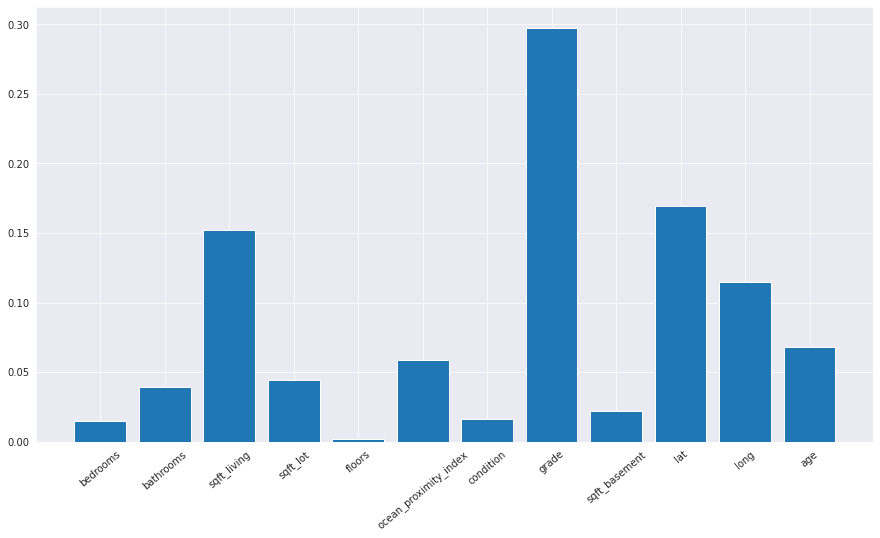

In [ ]:
plt.figure(figsize = (15, 8))
feat_list = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'ocean_proximity_index',
 'condition',
 'grade',
 'sqft_basement',
 'lat',
 'long',
 'age']
plt.bar(vals, imp, orientation = "vertical")
plt.xticks(vals, feat_list, rotation=40)


In [ ]:
print("number of trees:",pi.getNumTrees)
print("maxDepth:",pi.getOrDefault("maxDepth"))

number of trees: 20
maxDepth: 5


In [ ]:
out = gbt_predictions1.toPandas()
out.to_csv('seattle_house_prices_predicted.csv')

In [ ]:
dff = df

In [ ]:
dff['predicted'] = out["prediction"]

In [ ]:
def Interactive_map(frame, zm=8, ht=500, wdt=1200):

    frame.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True)

    color_scale = [(0, 'orange'), (1,'red')]
    fig = px.scatter_mapbox(frame, 
                            lat="lat", 
                            lon="long", 
                            hover_name="predicted", 
                            hover_data=["predicted"],
                            color_continuous_scale=color_scale,
                            zoom=zm, 
                            height=ht,
                            width=wdt)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [ ]:
Interactive_map(dff)

In [ ]:
X = housing_model.select("bedrooms", "bathrooms", "sqft_living" ,"lat","long").toPandas()
Y = housing_model.select("price").toPandas()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.2, random_state= 10)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(n_estimators=30, learning_rate=0.05, max_depth=10, random_state=0)
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.7663571370141796

In [ ]:
def predicting(location, sqft_living, bedrooms, bath):

    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(location) +'?format=json'

    response = requests.get(url).json()
    
    x = np.zeros(5)
    x[0] = bedrooms
    x[1] = bath
    x[2] = sqft_living
    x[3] = response[0]["lat"]
    x[4] = response[0]["lon"]
    
    value = gb_clf.predict([x])[0]

    value1 = pd.DataFrame([value], columns = ['predicted'], index=[0])

    xx = pd.DataFrame([x], columns = ["bed", "bath", 'sqft', "lat", "long"], index=[0])

    final = pd.concat([value1, xx], axis=1)

    Interactive_map(final, zm=11, ht=300, wdt=300)


    return print("House price for your requirements:  $", value)

In [ ]:
predicting("211 W Highland Dr, Seattle, WA 98119", 1000, 4, 2)

House price for your requirements:  $ 491640.22605140164


In [ ]:
predicting("3435 California Ave SW, Seattle, WA 98116", 1000, 3, 1)

House price for your requirements:  $ 433958.9025598331


In [ ]:
predicting("211 W Highland Dr, Seattle, WA 98119", 2000, 3, 1)

House price for your requirements:  $ 720705.2013804736


## **Future work:**
Initially we wanted to merge various datasets available online, of different cities and states to create a larger dataset. But due to the difference in the features available in each dataset it was not easy to find the suitable datasets to carry forward this idea, given the time constraints.
However, with the right datasets, using the exploratory, preprocessing and Ml modeling methods that we have learnt and applied, we can extend it to this new data as well.


## References 

https://www.velotio.com/engineering-blog/real-time-text-classification-using-kafka-and-scikit-learn

https://www.kaggle.com/datasets/sameersmahajan/seattle-house-sales-prices?select=house_sales.csv
